Converged after 63 iterations!

Results:
Starting point: x = 2
Found minimum at: x = -2.999996
Function value at minimum: y = 0.000000
Actual minimum should be at x = -3, y = 0

Verification:
Analytical solution: x = -3
Error in x: 0.000004


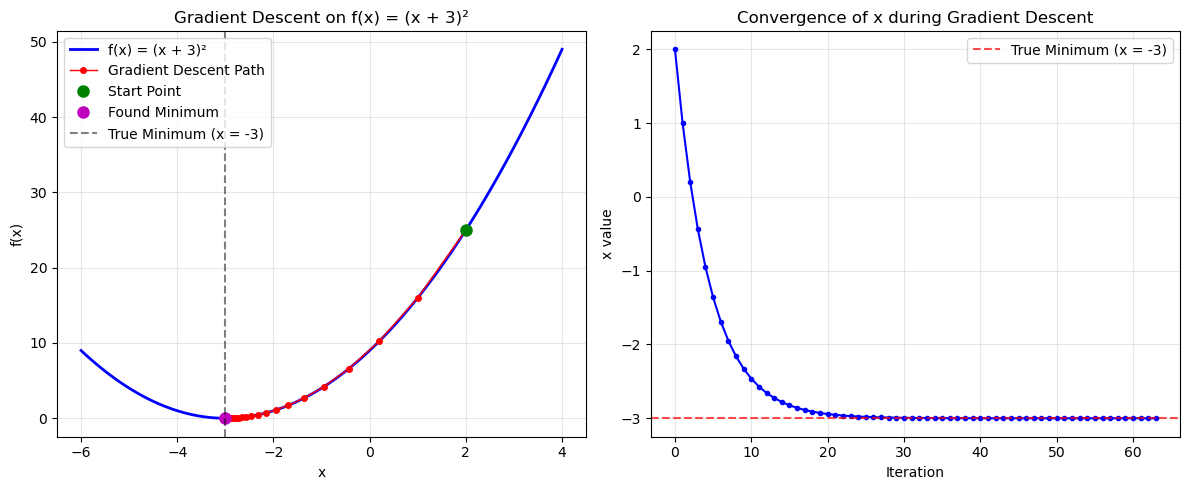


Experimenting with different learning rates:
Reached maximum iterations (100) without full convergence.
Learning rate 0.01: x =  -2.3369, iterations = 100 ✗ Did not converge
Converged after 63 iterations!
Learning rate 0.10: x =  -3.0000, iterations =  63 ✓ Converged
Converged after 2 iterations!
Learning rate 0.50: x =  -3.0000, iterations =   2 ✓ Converged
Reached maximum iterations (100) without full convergence.
Learning rate 1.10: x = 414089869.6101, iterations = 100 ✗ Did not converge


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(function, derivative, start_point, learning_rate=0.1, tolerance=1e-6, max_iterations=1000):
    """
    Implements gradient descent algorithm to find local minima.
    
    Parameters:
    - function: The objective function to minimize
    - derivative: The derivative of the objective function
    - start_point: Initial starting point for x
    - learning_rate: Step size for each iteration (default: 0.1)
    - tolerance: Convergence threshold (default: 1e-6)
    - max_iterations: Maximum number of iterations (default: 1000)
    
    Returns:
    - x_min: The x-value at the local minimum
    - y_min: The function value at the local minimum
    - iterations: Number of iterations performed
    - x_history: History of x values during optimization (for plotting)
    """
    
    x = start_point
    x_history = [x]
    
    for i in range(max_iterations):
        # Calculate gradient at current point
        grad = derivative(x)
        
        # Update x using gradient descent formula
        x_new = x - learning_rate * grad
        
        # Store history for plotting
        x_history.append(x_new)
        
        # Check for convergence
        if abs(x_new - x) < tolerance:
            print(f"Converged after {i+1} iterations!")
            return x_new, function(x_new), i+1, x_history
        
        x = x_new
    
    print(f"Reached maximum iterations ({max_iterations}) without full convergence.")
    return x, function(x), max_iterations, x_history

# Define the function and its derivative
def objective_function(x):
    """f(x) = (x + 3)²"""
    return (x + 3) ** 2

def derivative_function(x):
    """f'(x) = 2(x + 3)"""
    return 2 * (x + 3)

# Set parameters
start_x = 2
learning_rate = 0.1

# Run gradient descent
x_min, y_min, iterations, x_history = gradient_descent(
    objective_function, 
    derivative_function, 
    start_x, 
    learning_rate=learning_rate
)

print(f"\nResults:")
print(f"Starting point: x = {start_x}")
print(f"Found minimum at: x = {x_min:.6f}")
print(f"Function value at minimum: y = {y_min:.6f}")
print(f"Actual minimum should be at x = -3, y = 0")

# Verification
print(f"\nVerification:")
print(f"Analytical solution: x = -3")
print(f"Error in x: {abs(x_min - (-3)):.6f}")

# Plotting the results
def plot_gradient_descent():
    """Plot the function and gradient descent path"""
    # Create x values for plotting the function
    x_plot = np.linspace(-6, 4, 100)
    y_plot = objective_function(x_plot)
    
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Function and gradient descent path
    plt.subplot(1, 2, 1)
    plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = (x + 3)²')
    plt.plot(x_history, [objective_function(x) for x in x_history], 'ro-', 
             markersize=4, linewidth=1, label='Gradient Descent Path')
    plt.plot(start_x, objective_function(start_x), 'go', markersize=8, label='Start Point')
    plt.plot(x_min, y_min, 'mo', markersize=8, label='Found Minimum')
    plt.axvline(x=-3, color='k', linestyle='--', alpha=0.5, label='True Minimum (x = -3)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent on f(x) = (x + 3)²')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Convergence of x values
    plt.subplot(1, 2, 2)
    plt.plot(range(len(x_history)), x_history, 'b-o', markersize=3)
    plt.axhline(y=-3, color='r', linestyle='--', alpha=0.7, label='True Minimum (x = -3)')
    plt.xlabel('Iteration')
    plt.ylabel('x value')
    plt.title('Convergence of x during Gradient Descent')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_gradient_descent()

# Experiment with different learning rates
print("\n" + "="*50)
print("Experimenting with different learning rates:")
learning_rates = [0.01, 0.1, 0.5, 1.1]

for lr in learning_rates:
    try:
        x_min_lr, y_min_lr, iter_lr, _ = gradient_descent(
            objective_function, 
            derivative_function, 
            start_x, 
            learning_rate=lr,
            max_iterations=100
        )
        status = "✓ Converged" if iter_lr < 100 else "✗ Did not converge"
        print(f"Learning rate {lr:4.2f}: x = {x_min_lr:8.4f}, iterations = {iter_lr:3d} {status}")
    except Exception as e:
        print(f"Learning rate {lr:4.2f}: Error - {e}")